Import relevant libraries

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Open the csv file

In [131]:
file_path = r"spotify_youtube_sample.csv"
df = pd.read_csv(file_path, index_col= [0])
df.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Charlie Puth,https://open.spotify.com/artist/6VuMaDnrHyPL1p...,We Don't Talk Anymore (feat. Selena Gomez),Nine Track Mind,album,spotify:track:37FXw5QGFN7uwwsLy8uAc0,0.728,0.563,1.0,-8.053,...,https://www.youtube.com/watch?v=3AtDnEC4zak,Charlie Puth - We Don't Talk Anymore (feat. Se...,Charlie Puth,2.925710e+09,13643149.0,395627.0,Charlie Puth - We Don't Talk Anymore (feat. Se...,True,True,1.468032e+09
1,Angus & Julia Stone,https://open.spotify.com/artist/4tvKz56Tr39bkh...,Santa Monica Dream,Down the Way,album,spotify:track:2aaHkPnIpvGRD1FEnKYIte,0.621,0.261,5.0,-13.805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.084215e+07
2,George Ezra,https://open.spotify.com/artist/2ysnwxxNtSgbb9...,Hold My Girl,Staying at Tamara's,album,spotify:track:42bbDWZ8WmXTH7PkYAlGLu,0.614,0.527,10.0,-6.374,...,https://www.youtube.com/watch?v=6Xlo2abddXU,George Ezra - Hold My Girl (Official Video),GeorgeEzraVEVO,2.771348e+07,168883.0,4743.0,George Ezra - Hold My Girl (Official Video)\nT...,True,True,2.657910e+08
3,Playboi Carti,https://open.spotify.com/artist/699OTQXzgjhIYA...,Fell In Luv (feat. Bryson Tiller),Die Lit,album,spotify:track:1s9DTymg5UQrdorZf43JQm,0.657,0.668,2.0,-6.208,...,https://www.youtube.com/watch?v=NbbSXcJ41Fg,Playboi Carti - Fell In Luv (Official Audio) f...,Playboi Carti,4.454693e+06,91199.0,1952.0,Playboi Carti - Fell In Luv (Official Audio) f...,False,True,2.282542e+08
4,Abel Pintos,https://open.spotify.com/artist/6HTUcOExehqydq...,Motivos,Abel,album,spotify:track:2n8VYWU3mMrziR2ua8leHu,0.732,0.490,7.0,-8.359,...,https://www.youtube.com/watch?v=URlg_bziE9w,Abel Pintos - Motivos (Vídeo oficial) [HD],juampy oliva,3.627860e+05,1057.0,21.0,"""Cómo te explico lo esencial de tu existencia ...",False,False,3.030110e+07


Data Cleaning and Manipulation

In [132]:
df.shape

(2072, 27)

In [133]:
# Check null values for each row
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]
null_rows.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
1,Angus & Julia Stone,https://open.spotify.com/artist/4tvKz56Tr39bkh...,Santa Monica Dream,Down the Way,album,spotify:track:2aaHkPnIpvGRD1FEnKYIte,0.621,0.261,5.0,-13.805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40842146.0
29,Los Temerarios,https://open.spotify.com/artist/3YbOSxo85kla7R...,Ahí Estaré Yo,Camino del Amor,album,spotify:track:54gaPLcsCWmPUmrgpib9mS,0.667,0.337,1.0,-13.581,...,https://www.youtube.com/watch?v=70pSQxTEraE,Los Temerarios - Ahi Estare Yo,Corazon Romantico,1022166.0,12039.0,444.0,NaN,False,False,29123236.0
31,Cem Adrian,https://open.spotify.com/artist/2AWUCT9xtcvkjp...,Sen Benim Şarkılarımsın,Sen Benim Şarkılarımsın,single,spotify:track:5LPgor25Umb3jZgvTXvBeh,0.553,0.380,4.0,-10.697,...,https://www.youtube.com/watch?v=brRnhthvnKs,Cem Adrian & Hande Mehan - Sen Benim Şarkılar...,Cem Adrian,55063046.0,440705.0,NaN,Cem Adrian & Hande Mehan - Sen Benim Şarkılar...,False,True,62921779.0
36,Black Sabbath,https://open.spotify.com/artist/5M52tdBnJaKSvO...,Iron Man - 2012 - Remaster,Paranoid (Remaster),album,spotify:track:3IOQZRcEkplCXg6LofKqE9,0.336,0.792,9.0,-10.875,...,https://www.youtube.com/watch?v=5s7_WbiR79E,"BLACK SABBATH - ""Iron Man"" (Official Video)",Black Sabbath,44231930.0,371999.0,11939.0,"The original, official ""Iron Man"" music video\...",True,True,NaN
45,Inspector,https://open.spotify.com/artist/4OiCK9NnTWhakD...,No Piensa En Ti,"Unidad, Cerveza y Ska",album,spotify:track:6zc3skkzxwCJXVywiv7JvM,0.702,0.800,9.0,-3.256,...,https://www.youtube.com/watch?v=AKtzzRCdipA,No piensa en ti - Inspector (( letra )),Ariana Trejo,34374512.0,130181.0,1976.0,NaN,False,False,37396670.0


In [134]:
# Remove rows with null values
df = df.drop(null_rows.index)
df.shape

(1897, 27)

Filter some useful content

In [135]:
df = df.drop(['Url_spotify', 'Track', 'Album', 'Uri', 'Url_youtube', 'Title',
              'Channel', 'Description', 'official_video'], axis = 1)

Convert the data type (float --> int)

In [136]:
df.dtypes

Artist               object
Album_type           object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Views               float64
Likes               float64
Comments            float64
Licensed             object
Stream              float64
dtype: object

In [137]:
col_convert = ['Key', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream']
df[col_convert] = df[col_convert].astype('int64') 

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1897 entries, 0 to 2071
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            1897 non-null   object 
 1   Album_type        1897 non-null   object 
 2   Danceability      1897 non-null   float64
 3   Energy            1897 non-null   float64
 4   Key               1897 non-null   int64  
 5   Loudness          1897 non-null   float64
 6   Speechiness       1897 non-null   float64
 7   Acousticness      1897 non-null   float64
 8   Instrumentalness  1897 non-null   float64
 9   Liveness          1897 non-null   float64
 10  Valence           1897 non-null   float64
 11  Tempo             1897 non-null   int64  
 12  Duration_ms       1897 non-null   int64  
 13  Views             1897 non-null   int64  
 14  Likes             1897 non-null   int64  
 15  Comments          1897 non-null   int64  
 16  Licensed          1897 non-null   object 
 17  

Possible Analyses:

1) Popular Artists/ Albums

2) View Count and Likes due to different parameters

3) Licensing

Albums Distribution

(900.0, 1200.0)

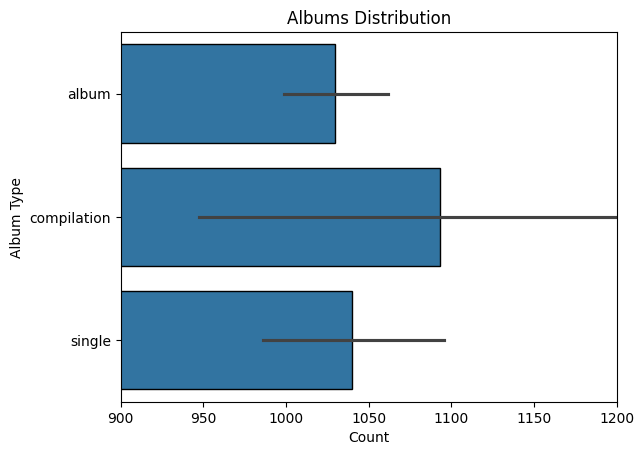

In [139]:
ax = sns.barplot(df['Album_type'], edgecolor = 'black')
ax.set_title( "Albums Distribution")
ax.set_xlabel( "Count")
ax.set_ylabel( "Album Type")
ax.set_xlim(900, 1200) 

Text(0, 0.5, 'Artist')

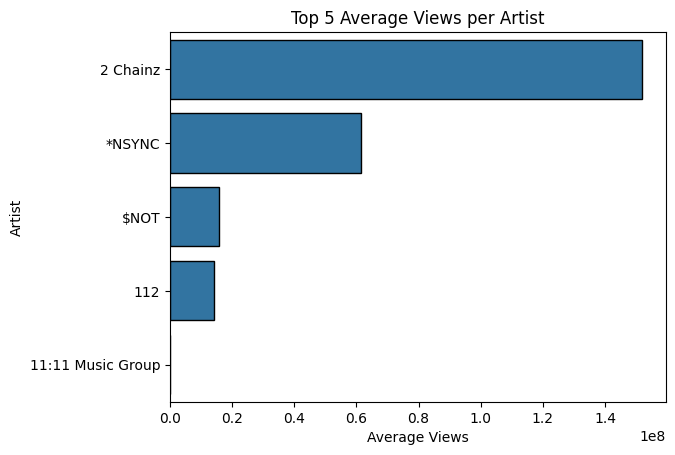

In [140]:
artist_view = df.groupby('Artist')['Views'].mean().head(5).reset_index()
artist_view = artist_view.sort_values(by=['Views'], ascending=False)
ax = sns.barplot(x='Views', y='Artist', data=artist_view, edgecolor='black')
ax.set_title("Top 5 Average Views per Artist")
ax.set_xlabel("Average Views")
ax.set_ylabel("Artist")

Text(0, 0.5, 'Artist')

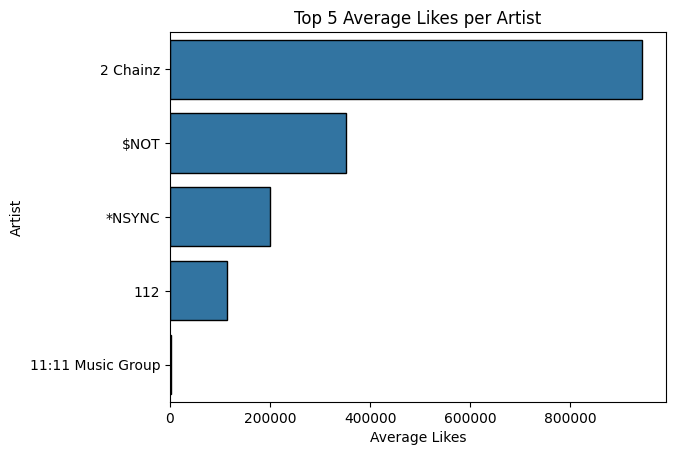

In [141]:
like = df.groupby('Artist')['Likes'].mean().head(5).reset_index()
like = like.sort_values(by=['Likes'], ascending=False)
ax = sns.barplot(x='Likes', y='Artist', data=like, edgecolor='black')
ax.set_title("Top 5 Average Likes per Artist")
ax.set_xlabel("Average Likes")
ax.set_ylabel("Artist")

We shall identify different parameters using correlation matrix to see why some songs are popular.

Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix of Song Popularity')

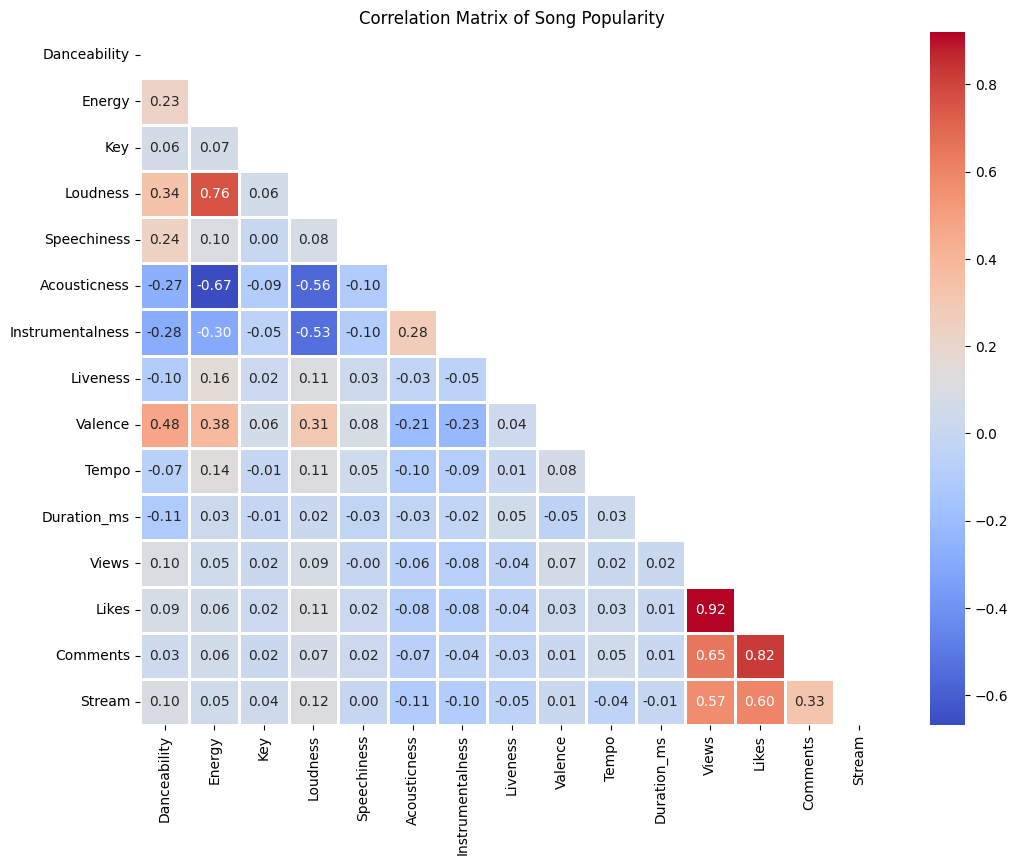

In [142]:
float_df = df.drop(['Artist', 'Album_type', 'Licensed'], axis=1)

plt.figure(figsize = (12,9))
correlation_matrix = float_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot=True,
             fmt=".2f", mask=mask, linewidths=.8)
plt.title('Correlation Matrix of Song Popularity')

Exploring Relationships: Pairwise Scatter Plots of Views, Likes, and Comments

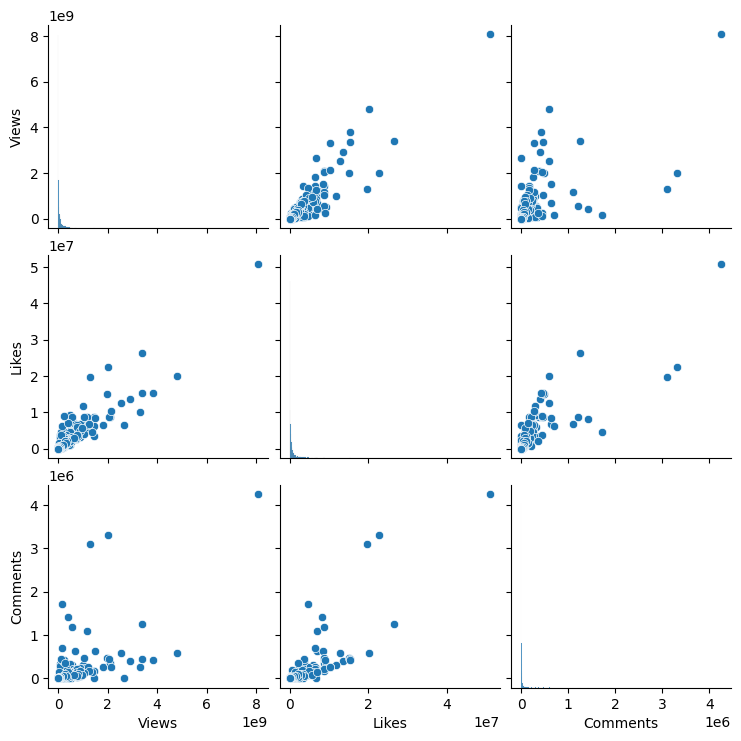

In [143]:
sns.pairplot(df[['Views', 'Likes', 'Comments']])

Bivariate Distribution Plot to visualize the relationship between the Acousticness and Loudness concerning the Energy Levels

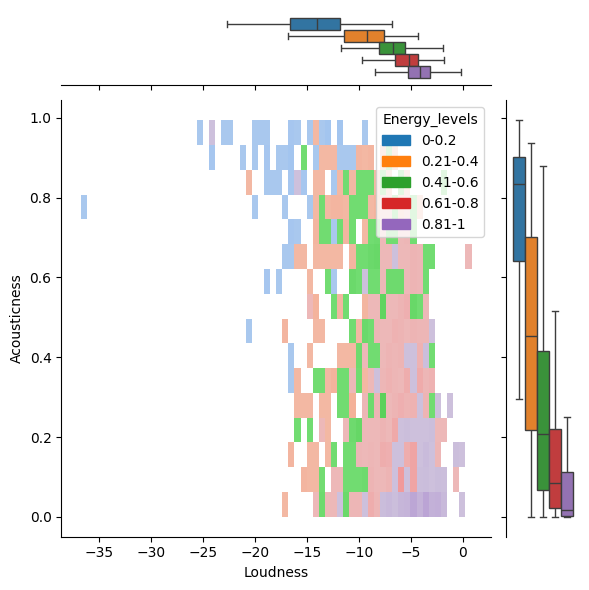

In [145]:
df['Energy_levels'] = pd.cut(df['Energy'], bins=[0.1,0.3,0.5,0.7,0.9,1.1], labels=['0-0.2', '0.21-0.4', '0.41-0.6', '0.61-0.8', '0.81-1'])
g = sns.JointGrid(data=df, x="Loudness", y="Acousticness", hue="Energy_levels")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot, showfliers=False)

Drawing Insights

The data reveals that 2 Chainz has the highest number of views and likes, implying that his songs might be the most popular in the dataset. However, during our analysis, we noticed a strong positive correlation between views, likes, and comments, while other factors contributed little to explaining the high view counts. 

Additionally, we discovered that a song's energy is significantly influenced by its loudness and acousticness. More energetic songs tend to have fewer acoustic instruments, as they generally feature lower loudness levels.